In [1]:
#import os
import keras

#Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
#資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

#Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

#Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])   
    return model

In [6]:
#超參數設定
"""
Set your required experiment parameters
"""
#lr=0.01
lr = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}

for opti in OPTIMIZER:
    keras.backend.clear_session() #把舊的Graph清掉
    print("Experiment with Optimizer = %s" % str(opti))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "optimizer-%s" % str(opti)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196

196/196 [==============================] - 2s 11ms/step - loss: 0.7502 - accuracy: 0.7328 - val_loss: 1.6148 - val_accuracy: 0.5037
Experiment with Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Train

196/196 [==============================] - 3s 17ms/step - loss: 2.3080 - accuracy: 0.1014 - val_loss: 2.3083 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 2.3077 - accuracy: 0.1007 - val_loss: 2.3180 - val_accuracy: 0.1000
Experiment with Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________

196/196 [==============================] - 2s 11ms/step - loss: 0.9039 - accuracy: 0.6761 - val_loss: 1.8358 - val_accuracy: 0.4436
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8959 - accuracy: 0.6798 - val_loss: 1.7320 - val_accuracy: 0.4734
Epoch 50/50
196/196 [==============================] - 2s 13ms/step - loss: 0.8764 - accuracy: 0.6838 - val_loss: 1.6947 - val_accuracy: 0.4733
Experiment with Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________

196/196 [==============================] - 3s 15ms/step - loss: 2.3068 - accuracy: 0.1000 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 3s 14ms/step - loss: 2.3073 - accuracy: 0.0983 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 3s 14ms/step - loss: 2.3072 - accuracy: 0.0996 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3065 - accuracy: 0.1005 - val_loss: 2.3055 - val_accuracy: 0.1000


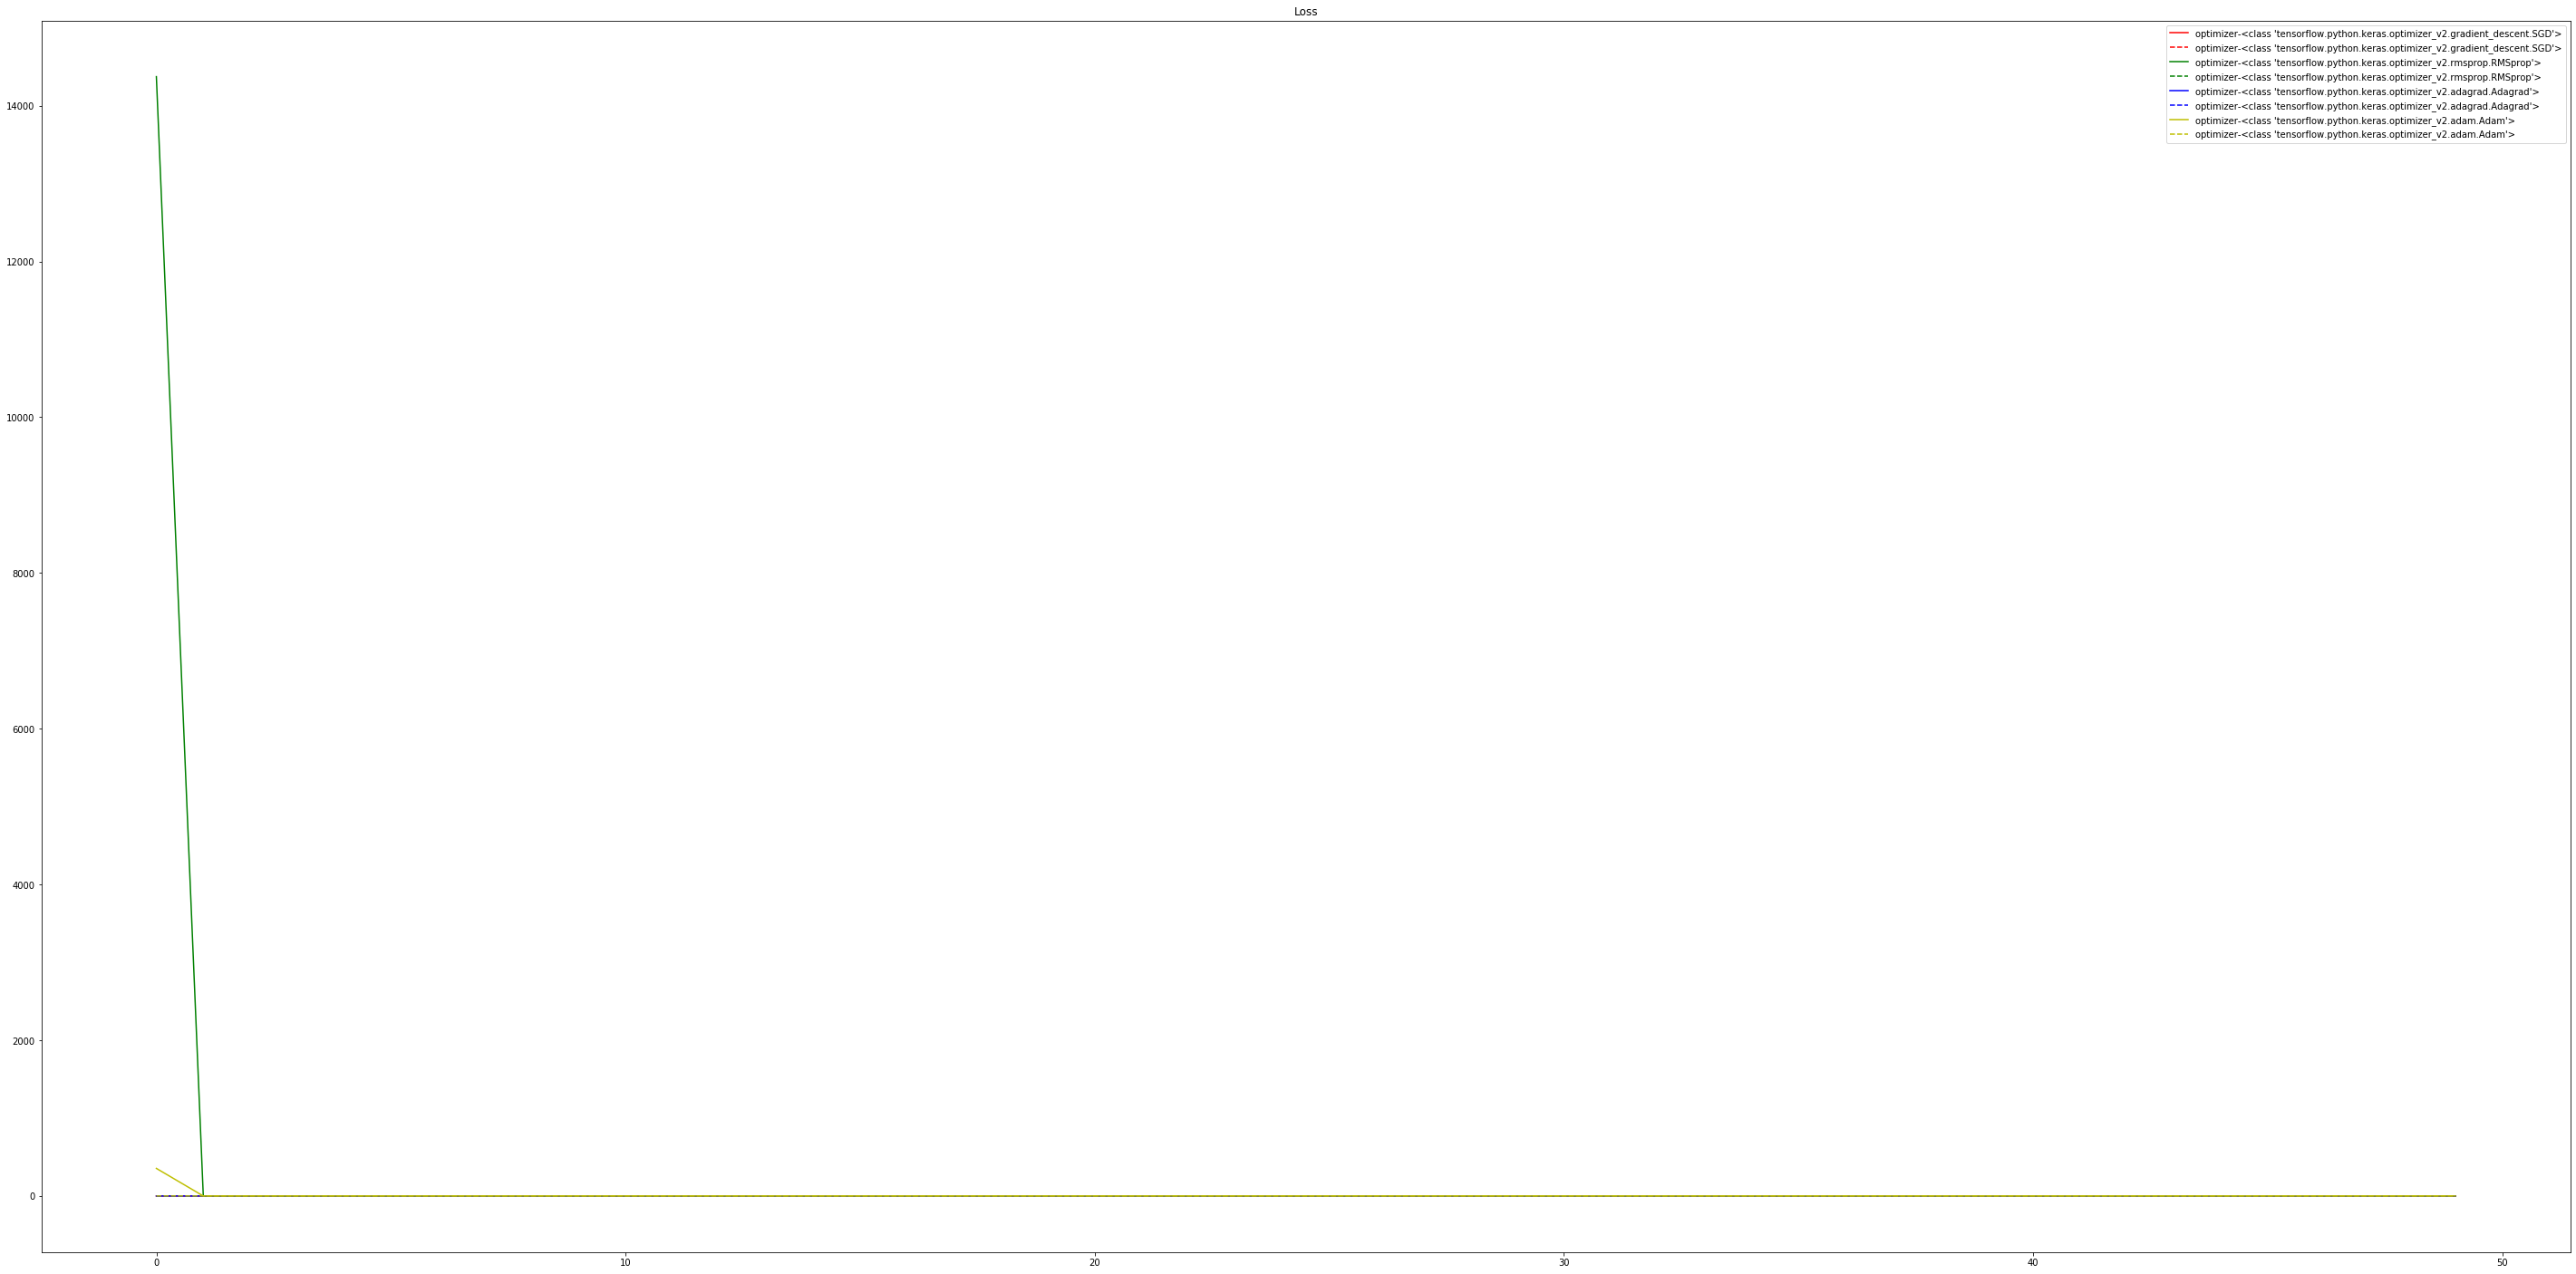

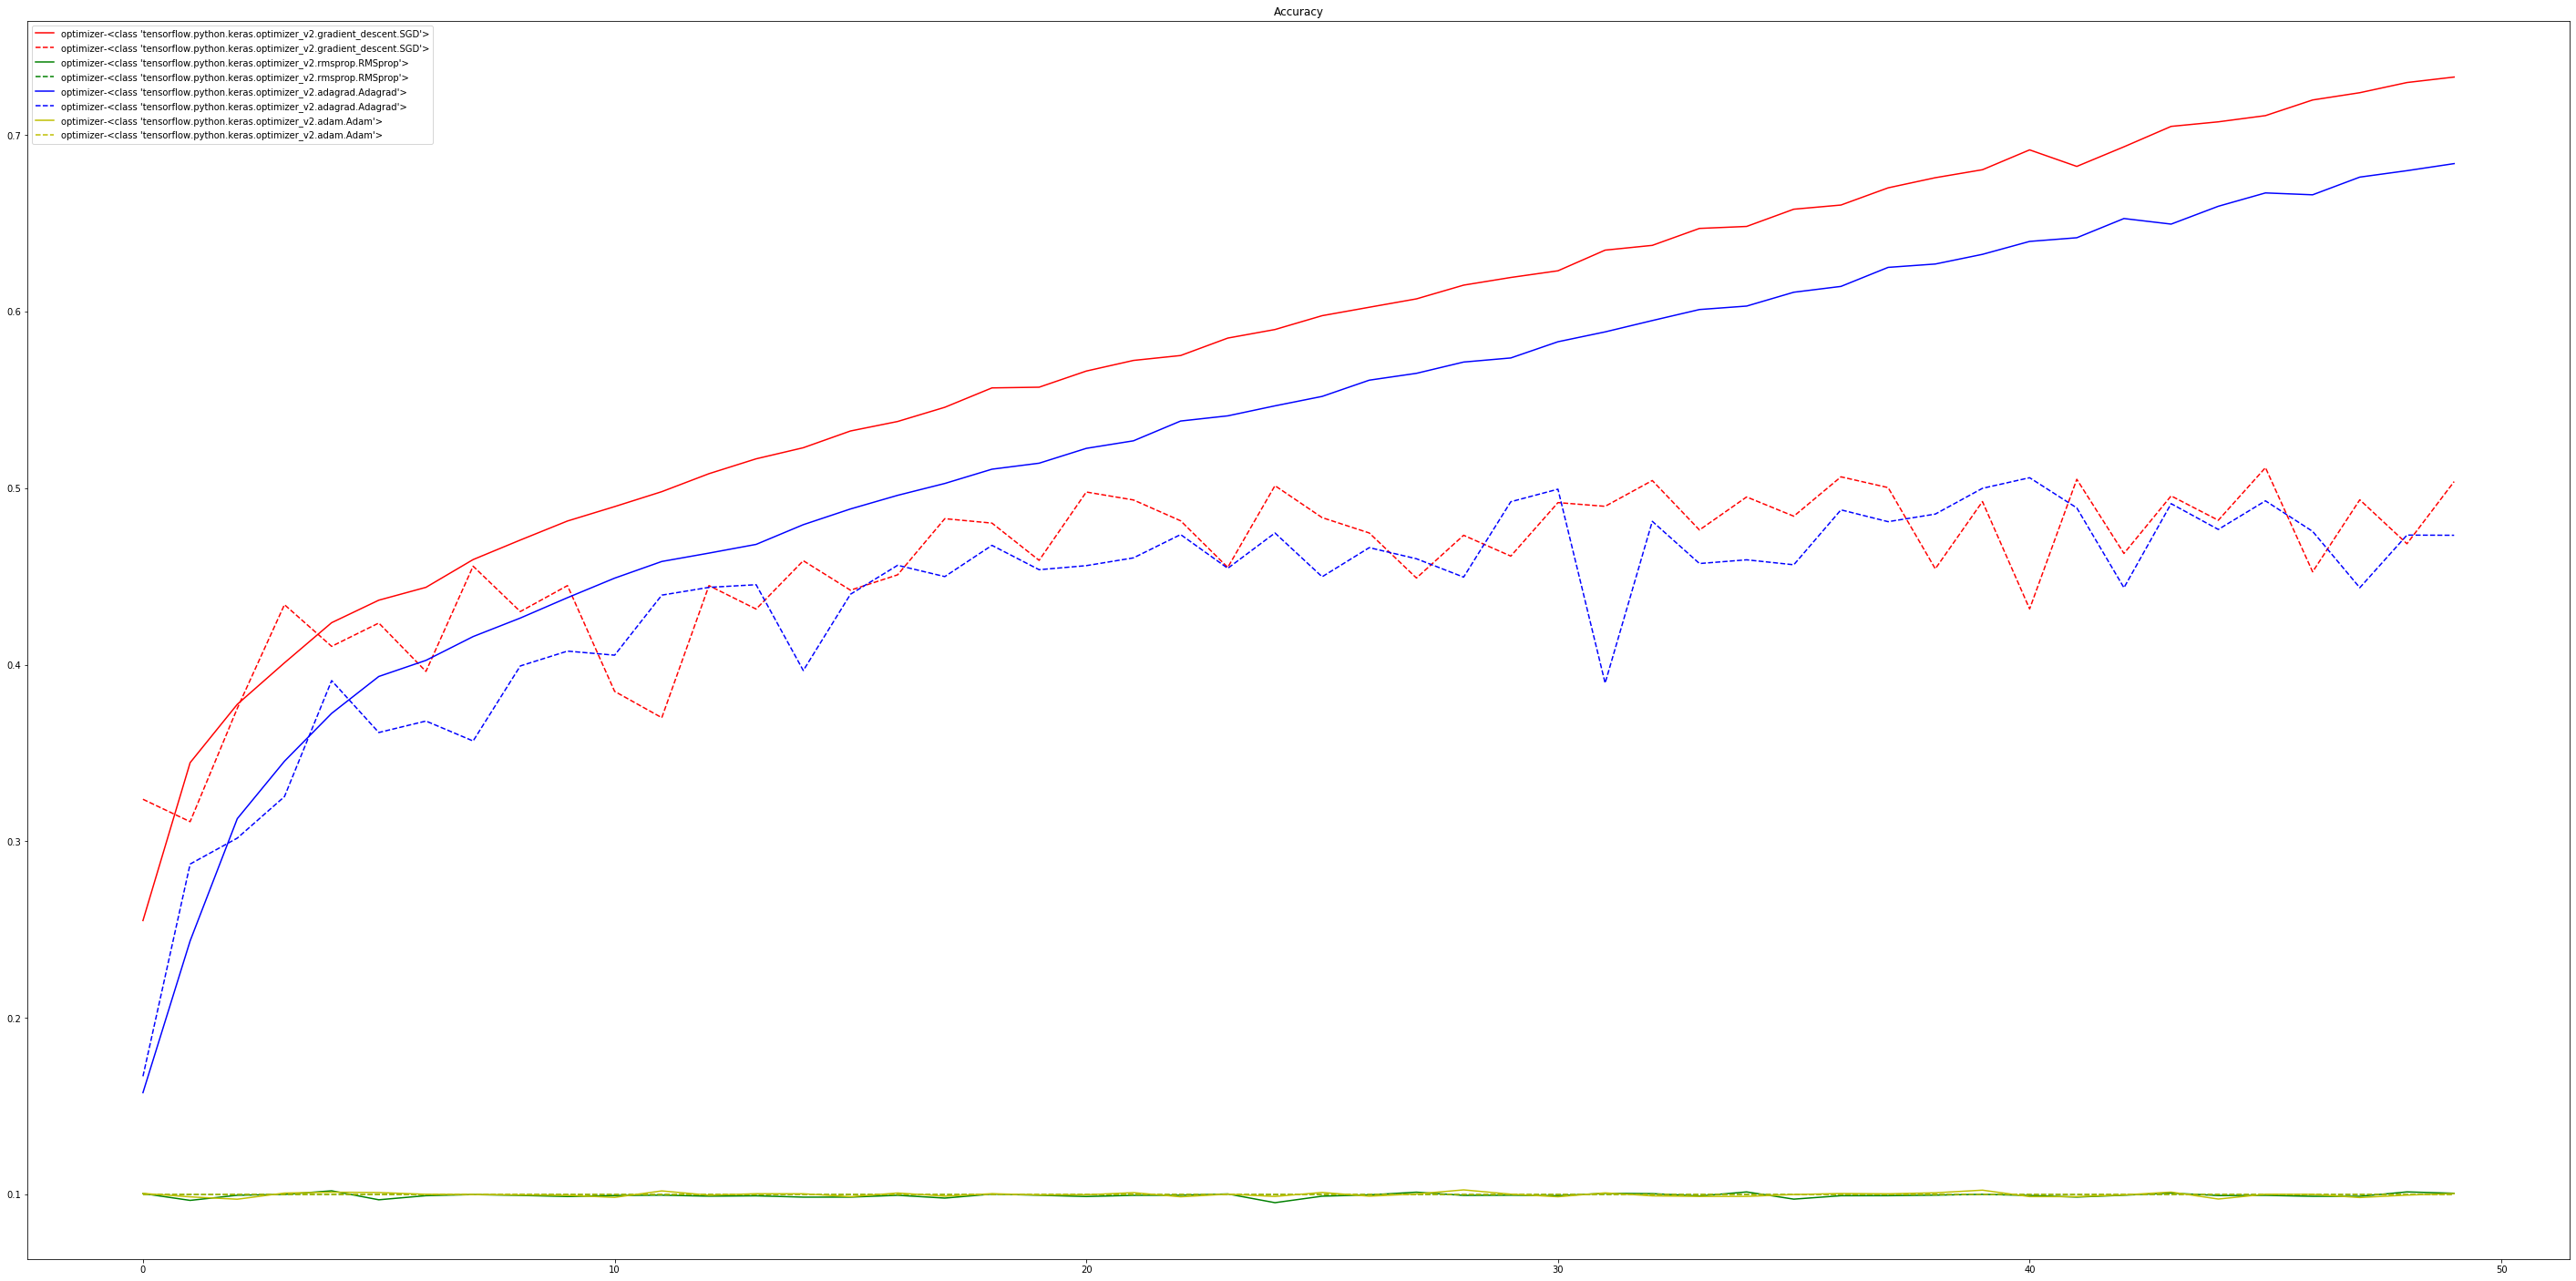

In [8]:
"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(50, 25))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(50,25))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()